 
Python Version- 3.7
Pandas Version- 1.0.3

In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_profiling
%matplotlib inline

##Append the data sets together from the two the sheets.

In [0]:
#The excel sheet can be downloaded to the local machine 
sheets = pd.read_excel('/content/online_retail_II (1).xlsx', sheet_name=None)

In [0]:
#The sheet can't be read from the given url, due to SSL certification issue on my machine, faced an issue executing this command
#s = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx', sheet_name= None)

In [0]:
#merge the sheets and read it into a dataframe
df = pd.concat(sheets[frame] for frame in sheets.keys())

In [0]:
#Print the total number of records of the dataframe
print("Total no of rows:",len(df))

Total no of rows: 1067371


##Profiling of Data- Statistics

In [0]:
#To preview the data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [0]:
#To get the information of the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [0]:
#Describe the dataframe to get statistics- mean, min, count, max
df.describe().round(2)

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [0]:
#Check the dataframe for null values
df_missing=df.isnull().sum().sort_values()
df_missing

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
Description      4382
Customer ID    243007
dtype: int64

Text(0.5, 1.0, 'Missing values')

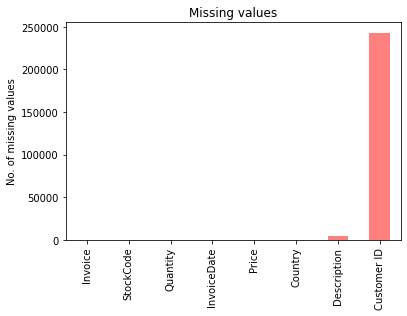

In [0]:
#Plot the missing values for each column of the dataframe
df_missing.plot(kind='bar',color='red',alpha=0.5)
plt.ylabel('No. of missing values')
plt.title('Missing values')

<Figure size 288x432 with 0 Axes>

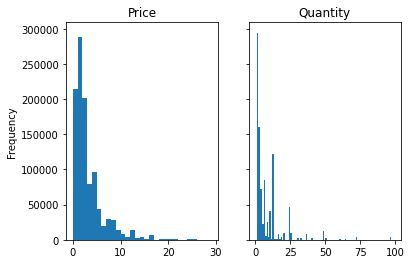

In [0]:
#Plot frequency of numerical columns 
plt.figure(figsize=(4,6))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df['Price'].plot(ax=ax1, kind='hist', bins=np.arange(30))
df['Quantity'].plot(ax=ax2, kind='hist',bins=np.arange(100))

ax1.title.set_text('Price')
ax2.title.set_text('Quantity')



In [0]:
#To get number of unique values of each column of the
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<Figure size 432x288 with 0 Axes>

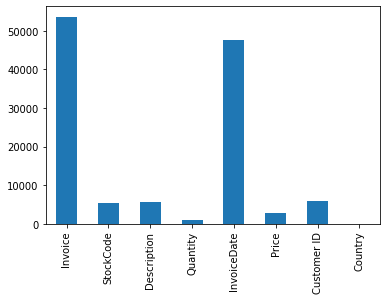

In [0]:
#Plot of unique values

plt.figure()
fig, ax = plt.subplots()
df.nunique().plot(ax=ax, kind='bar')

## Data Cleaning

In [0]:
count= df["Invoice"].count()
count

1067371

In [0]:
#Data analysis
df.StockCode.value_counts()

85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
          ... 
90183c       1
37490D       1
23652        1
16201C       1
21022        1
Name: StockCode, Length: 5305, dtype: int64

In [0]:
df.StockCode.unique()

array([85048, '79323P', '79323W', ..., 23609, 23617, 23843], dtype=object)

In [0]:
#Returns the count of the values of each Customer ID

df["Customer ID"].value_counts(dropna=True)

17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
           ...  
13205.0        1
13215.0        1
15893.0        1
13222.0        1
15316.0        1
Name: Customer ID, Length: 5942, dtype: int64

In [0]:
len(df["Customer ID"])

1067371

In [0]:
#returns the rowns with any null values present

df[df.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [0]:
#Drop the null values from the dataset and create dataset df_new

df_new= df.dropna()

In [0]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [0]:
#Dataframe for a specific stock code checked
df[(df.Invoice=='C489559')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#check again for null values count
df_new.isnull().sum().sort_values(ascending=False)

Country        0
Customer ID    0
Price          0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
Invoice        0
dtype: int64

In [0]:
#Cancelled invoices logic--

#string to be searched at the beginning of column data  
search ="C"
  
df_new[df_new["Invoice"].astype(str).str.startswith(search)]

df_new[df_new["Invoice"]=='C489449']

#all the cancelled invoices have negative quantities

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [0]:
#to check if any negative price exists for the invoices that are not cancelled
df_new[(df_new["Invoice"].astype(str).str.startswith(search)) & (df_new['Price']<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#to check if any negative price exists for the invoices that are not cancelled
df_new[(~df_new["Invoice"].astype(str).str.startswith(search)) & (df_new['Price']<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#to check if any negative quantity exists for the invoices that are not cancelled
df_new[(~df_new["Invoice"].astype(str).str.startswith(search)) & (df_new['Quantity']<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:

#All the cancelled have negative quantities and therefore we can separate them into another dataframe
df_new = df_new[(df_new.Quantity > 0)]
df_cancelled= df_new[(df_new.Quantity < 0)]

In [0]:
#all the operations will be performed on our clean data taken in the dataframe df_new
df_new.count()

Invoice        805620
StockCode      805620
Description    805620
Quantity       805620
InvoiceDate    805620
Price          805620
Customer ID    805620
Country        805620
dtype: int64

In [0]:
df_new.describe().round(2)

,Quantity,Price,Customer ID
count,805620.00,805620.00,805620.00
mean,13.31,3.21,15331.86
std,144.31,29.20,1696.77
min,1.00,0.00,12346.00
25%,2.00,1.25,13982.00
50%,5.00,1.95,15271.00
75%,12.00,3.75,16805.00
max,80995.00,10953.50,18287.00


In [0]:
#Change column type of Customer ID to Int
df_new['Customer ID'] = df_new['Customer ID'].astype('int64')

In [0]:
# change description to LOWER case
df_new['Description'] = df_new.Description.str.lower()

In [0]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


<Figure size 432x288 with 0 Axes>

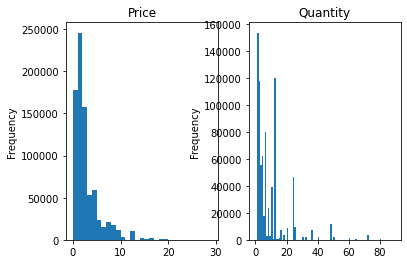

In [0]:
#df_new.groupby("Country").Price.mean().sort_values(ascending=False)[:5].plot.bar()

#Plot numerical columns
plt.figure()

fig, (ax1, ax2) = plt.subplots(1, 2)
df_new['Price'].plot(ax=ax1, kind='hist',bins=np.arange(30))
df_new['Quantity'].plot(ax=ax2, kind='hist',bins=np.arange(90))

ax1.title.set_text('Price')
ax2.title.set_text('Quantity')

In [0]:
df_new.describe()

,Quantity,Price,Customer ID
count,805620.000000,805620.000000,805620.000000
mean,13.307665,3.206279,15331.856250
std,144.306739,29.197901,1696.768395
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


In [0]:
#To get the year from the column Invoice Year

df_new['InvoiceYear']= df_new['InvoiceDate'].dt.year

In [0]:
#To get the month from the column Invoice Month

df_new['InvoiceMonth']= df_new['InvoiceDate'].dt.month

In [0]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12


In [0]:
#Amount is defined as the product of quantity and unit price of the stock product
df_new['Amount'] = (df_new['Quantity'] * df_new['Price'])

#Weighted Price of all the prices 
df_new['WeightedAmount']= sum(df_new['Amount'])/sum(df_new['Quantity'])
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Amount,WeightedAmount
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4,1.655028
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,1.655028
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,1.655028
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,100.8,1.655028
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,30.0,1.655028


##Create a StockCode, Invoice Year, Invoice Month level data set and create Summarized columns

In [0]:
#grouped dataframe containing stockcode, invoice year and invoice month level data set

In [0]:
grouped=df_new.groupby(['StockCode','InvoiceYear','InvoiceMonth']).aggregate({'Invoice':'nunique','Quantity':['sum','max'], 'Customer ID':'nunique', 'Price':['nunique',lambda x:(x.nunique()-1)],'Amount':'sum'})
grouped.columns = ['TotalOrders','TotalQuantity','MaxQuantity','UniqueCustomerCount', 'UniquePriceCount','PriceChangeCount','TotalAmount']
grouped= grouped.reset_index()

In [0]:
grouped['WeightedPrice']= grouped['TotalAmount']/grouped['TotalQuantity']
grouped['PriceChangeCount']= grouped['PriceChangeCount'].astype(int)
grouped['BelowWeightedPrice']= grouped['WeightedPrice']- grouped['TotalAmount']
grouped['AboveWeightedPrice']= grouped['TotalAmount']-grouped['WeightedPrice']
grouped

,StockCode,InvoiceYear,InvoiceMonth,TotalOrders,TotalQuantity,MaxQuantity,UniqueCustomerCount,UniquePriceCount,PriceChangeCount,TotalAmount,WeightedPrice,BelowWeightedPrice,AboveWeightedPrice
0,10002,2009,12,17,213,48,16,1,0,181.05,0.850000,-180.200000,180.200000
1,10002,2010,1,15,289,110,15,1,0,245.65,0.850000,-244.800000,244.800000
2,10002,2010,2,13,255,100,12,1,0,216.75,0.850000,-215.900000,215.900000
3,10002,2010,3,15,634,200,15,2,1,480.66,0.758139,-479.901861,479.901861
4,10002,2010,4,21,1129,300,20,2,1,838.75,0.742914,-838.007086,838.007086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60587,TEST001,2009,12,4,25,10,1,1,0,112.50,4.500000,-108.000000,108.000000
60588,TEST001,2010,1,4,20,5,1,1,0,90.00,4.500000,-85.500000,85.500000
60589,TEST001,2010,2,2,10,5,2,1,0,0.00,0.000000,0.000000,0.000000
60590,TEST001,2010,4,1,5,5,1,1,0,22.50,4.500000,-18.000000,18.000000


In [0]:

MaxQuantity=df_new.groupby(by=['StockCode', 'InvoiceYear', 'InvoiceMonth'], as_index=False).aggregate({'Quantity' :'max','Customer ID': 'min'})
MaxQuantity2=df_new.groupby(by=['StockCode', 'InvoiceYear', 'InvoiceMonth', 'Quantity'], as_index=False).aggregate({'Customer ID': 'min'})

#print(MaxQuantity)
#print(MaxQuantity2)

df_joined = pd.merge(grouped, MaxQuantity, left_on=['StockCode', 'InvoiceYear', 'InvoiceMonth', 'MaxQuantity'], right_on=['StockCode', 'InvoiceYear', 'InvoiceMonth', 'Quantity'], how='left', sort=True)
df_3 = df_joined[['StockCode', 'InvoiceYear', 'InvoiceMonth', 'UniqueCustomerCount', 'UniquePriceCount', 'Customer ID', 'PriceChangeCount', 'TotalOrders', 'WeightedPrice', 'TotalAmount', 'BelowWeightedPrice', 'AboveWeightedPrice', 'TotalQuantity', 'MaxQuantity']]
df_3


,StockCode,InvoiceYear,InvoiceMonth,UniqueCustomerCount,UniquePriceCount,Customer ID,PriceChangeCount,TotalOrders,WeightedPrice,TotalAmount,BelowWeightedPrice,AboveWeightedPrice,TotalQuantity,MaxQuantity
0,10002,2009,12,16,1,12510,0,17,0.850000,181.05,-180.200000,180.200000,213,48
1,10002,2010,1,15,1,12406,0,15,0.850000,245.65,-244.800000,244.800000,289,110
2,10002,2010,2,12,1,12583,0,13,0.850000,216.75,-215.900000,215.900000,255,100
3,10002,2010,3,15,2,12431,1,15,0.758139,480.66,-479.901861,479.901861,634,200
4,10002,2010,4,20,2,12406,1,21,0.742914,838.75,-838.007086,838.007086,1129,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60587,TEST001,2009,12,1,1,12346,0,4,4.500000,112.50,-108.000000,108.000000,25,10
60588,TEST001,2010,1,1,1,12346,0,4,4.500000,90.00,-85.500000,85.500000,20,5
60589,TEST001,2010,2,2,1,14103,0,2,0.000000,0.00,0.000000,0.000000,10,5
60590,TEST001,2010,4,1,1,16454,0,1,4.500000,22.50,-18.000000,18.000000,5,5


In [0]:

#Generating csv file as output

csv_data = grouped.to_csv(r'/content/assignmentA3.csv', index = False, header=True, sep='|')


##Insights

Insight- 1

*   The total number of orders/invoices of each month compared for the different years in the dataset- 2009,2010,2011
*   The maximum number of orders or invoicing happened in the month of November for both the years 2010 and 2011. 



Text(0, 0.5, 'Total no of orders')

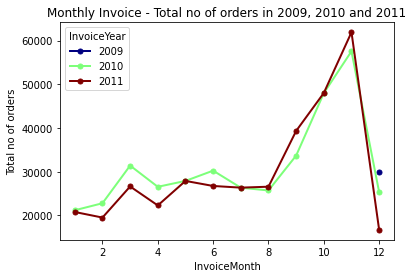

In [0]:
pv = pd.pivot_table(grouped, index=grouped.InvoiceMonth, columns=grouped.InvoiceYear,
                    values='TotalOrders', aggfunc='sum')
ax = pv.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Monthly Invoice - Total no of orders in 2009, 2010 and 2011')
ax.set_ylabel("Total no of orders")

Insight- 2


*   The total amount of products sold in the given years of the dataset
*   The year 2011 saw a slight fall in the total amount as compared to the sales in 2010



Text(0, 0.5, 'Total Amount')

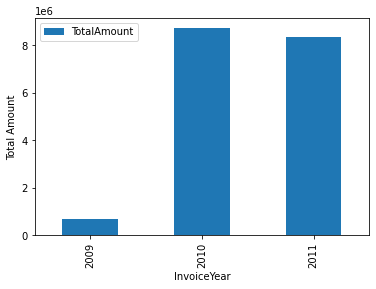

In [0]:
yearly_amount = grouped.groupby(by=['InvoiceYear'], as_index=False)['TotalAmount'].sum()
pt = yearly_amount.plot(kind='bar', x='InvoiceYear', y='TotalAmount')
pt.set_ylabel("Total Amount")


Insight- 3



*   Below I have spooled out a list of top 5 StockCodes, with the highest UniqueCustomerCount.
*   These can be considered as popular stocks among varied customers



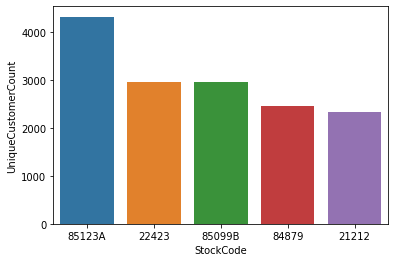

In [0]:
frame = grouped.sort_values(by='UniqueCustomerCount', ascending=False).groupby('StockCode')['UniqueCustomerCount'].sum()
frame2 = pd.DataFrame(frame.reset_index(name = "UniqueCustomerCount"))
frame_sorted = frame2.sort_values('UniqueCustomerCount', ascending=False).head(5)

sns.barplot(x='StockCode', y='UniqueCustomerCount', data=frame_sorted)

Insight - 4


*   This visualization is a bird's eye view on the number of instances when Price changes in a given month-year.
*   As we can see, for the most part, price did not change (count was 0). To further magnify the instances when it did change, we need to group by the StockCode and analyze which commodities faced how many price change instances.



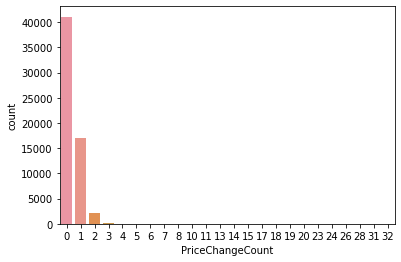

In [0]:
sns.countplot(x='PriceChangeCount', data=grouped)

## Grouping based on Description

Spliting the description column from the main dataframe and saving it as  list in "flat_list".

In [0]:
trial = df_new.Description.str.split().to_list()
trial

[['15cm', 'christmas', 'glass', 'ball', '20', 'lights'],
 ['pink', 'cherry', 'lights'],
 ['white', 'cherry', 'lights'],
 ['record', 'frame', '7"', 'single', 'size'],
 ['strawberry', 'ceramic', 'trinket', 'box'],
 ['pink', 'doughnut', 'trinket', 'pot'],
 ['save', 'the', 'planet', 'mug'],
 ['fancy', 'font', 'home', 'sweet', 'home', 'doormat'],
 ['cat', 'bowl'],
 ['dog', 'bowl', ',', 'chasing', 'ball', 'design'],
 ['heart', 'measuring', 'spoons', 'large'],
 ['lunchbox', 'with', 'cutlery', 'fairy', 'cakes'],
 ['door', 'mat', 'black', 'flock'],
 ['love', 'building', 'block', 'word'],
 ['home', 'building', 'block', 'word'],
 ['assorted', 'colour', 'bird', 'ornament'],
 ['peace', 'wooden', 'block', 'letters'],
 ['christmas', 'craft', 'white', 'fairy'],
 ['heart', 'ivory', 'trellis', 'large'],
 ['heart', 'filigree', 'dove', 'large'],
 ['full', 'english', 'breakfast', 'plate'],
 ['pizza', 'plate', 'in', 'box'],
 ['black', 'diner', 'wall', 'clock'],
 ['set', 'of', '3', 'black', 'flying', 'ducks'

In [0]:
flat_list = []
trial
for sublist in trial :
    for item in sublist :
        flat_list.append(item)
len(flat_list)

3546239

Using 'nltk' package, I removed the common english stock words which would have greater word count compared to others. From here I get the filtered_list.

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 
filtered_list=[]
for w in flat_list:
    if w not in stop_words: 
        filtered_list.append(w)
filtered_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['15cm',
 'christmas',
 'glass',
 'ball',
 '20',
 'lights',
 'pink',
 'cherry',
 'lights',
 'white',
 'cherry',
 'lights',
 'record',
 'frame',
 '7"',
 'single',
 'size',
 'strawberry',
 'ceramic',
 'trinket',
 'box',
 'pink',
 'doughnut',
 'trinket',
 'pot',
 'save',
 'planet',
 'mug',
 'fancy',
 'font',
 'home',
 'sweet',
 'home',
 'doormat',
 'cat',
 'bowl',
 'dog',
 'bowl',
 ',',
 'chasing',
 'ball',
 'design',
 'heart',
 'measuring',
 'spoons',
 'large',
 'lunchbox',
 'cutlery',
 'fairy',
 'cakes',
 'door',
 'mat',
 'black',
 'flock',
 'love',
 'building',
 'block',
 'word',
 'home',
 'building',
 'block',
 'word',
 'assorted',
 'colour',
 'bird',
 'ornament',
 'peace',
 'wooden',
 'block',
 'letters',
 'christmas',
 'craft',
 'white',
 'fairy',
 'heart',
 'ivory',
 'trellis',
 'large',
 'heart',
 'filigree',
 'dove',
 'large',
 'full',
 'english',
 'breakfast',
 'plate',
 'pizza',
 'plate',
 'box',
 'black',
 'diner',
 'wall',
 'clock',
 'set',
 '3',
 'black',
 'flying',
 'ducks'

In the filtered_list, I tag the words using the'nlkt' tags. Main idea behind the same is to remove the advejectives, verbs or connectors of the English language and keep only the nouns. 

In [0]:

#import re 
nltk.download('averaged_perceptron_tagger')
tagged_words = nltk.pos_tag(filtered_list)

tagged_wordframe = pd.DataFrame(tagged_words, columns=['Word','Tag'])
tagged_wordframe2 = tagged_wordframe[tagged_wordframe['Tag']!='CD']

#Removing the Unwanted Tags like - $ | , | : and only considering the words tagged as Nouns i.e. 'NN' and 'NNS'
tagged_wordframe_nouns = tagged_wordframe2[(tagged_wordframe2['Tag']=='NN') | (tagged_wordframe2['Tag']=='NNS')]
print(tagged_wordframe_nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
              Word  Tag
2            glass   NN
3             ball   NN
5           lights  NNS
8           lights  NNS
11          lights  NNS
...            ...  ...
3383846     parade   NN
3383847     baking   NN
3383850      piece   NN
3383851  retrospot   NN
3383852    postage   NN

[2000714 rows x 2 columns]


In [0]:
#Counting the occurences for different words in the filtered list

count_list = tagged_wordframe_nouns['Word'].value_counts().rename_axis('Word').reset_index(name='Counts')
count_list

,Word,Counts
0,bag,65730
1,heart,59298
2,design,40076
3,retrospot,39448
4,vintage,38842
...,...,...
2146,windproof,1
2147,"""v""",1
2148,maxwell,1
2149,swiss,1


So now I have a count of nouns in the column.

Loop through each cell of the description column, clean the column, match the cleaned keywords with the keywords in the count_list and set the keyword with max count as the Group Name

In [0]:
unique = df_new['Description'].unique()
df_unique = pd.DataFrame(unique, columns=['Description'])
trial_unique = df_unique.Description.str.split().to_list()
x = []
counter = 0
for item in trial_unique:
    print(item)
    filtered_list = [x for x in item if x not in stop_words]
    tagged_list = nltk.pos_tag(filtered_list)
    tagged_words = pd.DataFrame(tagged_list, columns=['Word','Tag'])
    #Keeping only NN and NNS
    tagged_wordframe = tagged_words[(tagged_words['Tag']=='NN') | (tagged_words['Tag']=='NNS')]
    print(tagged_wordframe)
    if(len(tagged_wordframe) != 0):
        df_joined = pd.merge(tagged_wordframe, count_list, on="Word", how="left")
        df_joined2 = df_joined.dropna()
        if(len(df_joined2) != 0):
            y = df_joined2['Word'].loc[df_joined2['Counts'].idxmax()]
            counter = counter + 1
        else:
            y = "Unknown"
            counter = counter + 1
    else:
        y = "Unknown"
        counter = counter + 1
    print(y)
    print("Iteration: ", counter)
    x.append(y)
    #df_new[df_new.Description.str.split().tolist() == item]['Word'] = df_joined['Word'].loc[df_joined['Counts'].idxmax()]
df_unique['Word']=x

Streaming output truncated to the last 5000 lines.
magnets
Iteration:  4558
['wrap', 'carousel']
       Word Tag
0      wrap  NN
1  carousel  NN
wrap
Iteration:  4559
['set', 'of', '6', 'nativity', 'magnets']
      Word  Tag
3  magnets  NNS
magnets
Iteration:  4560
['hen', 'house', 'with', 'chick', 'standing']
    Word Tag
0    hen  NN
1  house  NN
2  chick  NN
house
Iteration:  4561
['tumbler', 'baroque']
      Word Tag
0  tumbler  NN
1  baroque  NN
baroque
Iteration:  4562
['decoration', 'wobbly', 'chicken']
         Word Tag
0  decoration  NN
decoration
Iteration:  4563
['decoration', 'wobbly', 'rabbit', 'metal']
         Word Tag
0  decoration  NN
3       metal  NN
metal
Iteration:  4564
['childrens', 'cutlery', 'dolly', 'girl']
        Word  Tag
0  childrens  NNS
childrens
Iteration:  4565
['childrens', 'cutlery', 'spaceboy']
        Word  Tag
0  childrens  NNS
1    cutlery   NN
2   spaceboy   NN
spaceboy
Iteration:  4566
['childrens', 'cutlery', 'circus', 'parade']
        Word  

In [0]:
df_combined = pd.merge(df_new, df_unique, on='Description', how='inner')
df_combined.rename(columns={'Word': 'Group'}, inplace=True)
df_combined

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Amount,WeightedAmount,Group
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.40,1.655028,glass
1,489559,85048,15cm christmas glass ball 20 lights,12,2009-12-01 12:55:00,6.95,17056,United Kingdom,2009,12,83.40,1.655028,glass
2,489576,85048,15cm christmas glass ball 20 lights,5,2009-12-01 13:38:00,7.95,15984,United Kingdom,2009,12,39.75,1.655028,glass
3,489582,85048,15cm christmas glass ball 20 lights,2,2009-12-01 13:47:00,7.95,14543,United Kingdom,2009,12,15.90,1.655028,glass
4,489656,85048,15cm christmas glass ball 20 lights,12,2009-12-01 17:28:00,6.95,17428,United Kingdom,2009,12,83.40,1.655028,glass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805615,581404,85123A,cream hanging heart t-light holder,4,2011-12-08 13:47:00,2.95,13680,United Kingdom,2011,12,11.80,1.655028,heart
805616,581412,85123A,cream hanging heart t-light holder,4,2011-12-08 14:38:00,2.95,14415,United Kingdom,2011,12,11.80,1.655028,heart
805617,581432,85123A,cream hanging heart t-light holder,32,2011-12-08 15:51:00,2.55,13798,United Kingdom,2011,12,81.60,1.655028,heart
805618,581538,85123A,cream hanging heart t-light holder,1,2011-12-09 11:34:00,2.95,14446,United Kingdom,2011,12,2.95,1.655028,heart


Now to group the dataset with respect to the Group Word identified:

In [0]:
df_final = df_combined[['Group', 'Description', 'StockCode']].drop_duplicates()
df_final.reset_index(drop=True, inplace=True)
df_final= df_final[df_final['Group'] != 'Unknown']
df_final.sort_values(by='Group', inplace=True, ascending=True)
df_final

,Group,Description,StockCode
3775,adjustment,adjustment by peter on jun 25 2010,ADJUST2
2992,adjustment,adjustment by john on 26/01/2010 17,ADJUST
2990,adjustment,adjustment by john on 26/01/2010 16,ADJUST
1575,advent,woolly hat sock glove advent string,35832
2167,alarm,"icon alarm clock,fuschia pin up",81985A
...,...,...,...
36,wreath,cinammon & orange wreath,21351
37,wreath,eucalyptus & pinecone wreath,21352
1585,zinc,zinc finish 15cm planter pots,84763
2610,zinc,folkart zinc clip on angel wings,35963


In [0]:

#Generating csv file as output
import csv
df_final.to_csv(r'/content/assignment6.csv', index = False, header=True, sep='|', quoting=csv.QUOTE_NONE, quotechar="", escapechar="\\")
